In [2]:
from nltk.corpus import names

In [4]:
print(names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [5]:
print(len(names.words()))

7944


In [6]:
from nltk.tokenize import word_tokenize
sent = '''I am reading a book.
...       It is Python Machine Learning By Example,
...       2nd edition.'''
print(word_tokenize(sent))

['I', 'am', 'reading', 'a', 'book', '.', '...', 'It', 'is', 'Python', 'Machine', 'Learning', 'By', 'Example', ',', '...', '2nd', 'edition', '.']


In [7]:
sent2 = 'I have been to U.K. and U.S.A.'
print(word_tokenize(sent2))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [9]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(sent))

['I am reading a book.', '...', 'It is Python Machine Learning By Example,\n...       2nd edition.']


In [10]:
import nltk
tokens = word_tokenize(sent)
print(nltk.pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('.', '.'), ('...', ':'), ('It', 'PRP'), ('is', 'VBZ'), ('Python', 'NNP'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('By', 'IN'), ('Example', 'NNP'), (',', ','), ('...', ':'), ('2nd', 'CD'), ('edition', 'NN'), ('.', '.')]


In [12]:
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')
tokens2 = nlp(sent2)
print([token.text for token in tokens2])

I have been to U.K. and U.S.A.
['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A.']


In [15]:
print([(token.text, token.pos_) for token in tokens2])

[('I', 'PRON'), ('have', 'AUX'), ('been', 'AUX'), ('to', 'ADP'), ('U.K.', 'PROPN'), ('and', 'CCONJ'), ('U.S.A.', 'PROPN')]


In [18]:
tokens3 = nlp('The book written by Hayden Liu in 2018 was sold at $30 in America')
print([(token_ent.text, token_ent.label_) for token_ent in tokens3.ents])

[('Hayden Liu', 'PERSON'), ('2018', 'DATE'), ('30', 'MONEY'), ('America', 'GPE')]


In [20]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
print(porter_stemmer.stem('machines'))
print(porter_stemmer.stem('learning'))

machin
learn


In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('machines'))
print(lemmatizer.lemmatize('learning'))

machine
learning


In [24]:
from sklearn.datasets import fetch_20newsgroups
groups = fetch_20newsgroups()

In [25]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [27]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [28]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [29]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

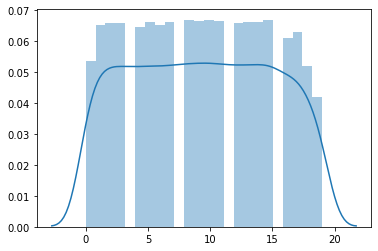

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(groups.target)
plt.show()

In [32]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [33]:
print(groups.target[0])
print(groups.target_names[groups.target[0]])

7
rec.autos


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)

In [35]:
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

In [36]:
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [37]:
data_count.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
print(count_vector.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25', '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able', 'about', 'above', 'ac', 'access', 'actually', 'address', 'after', 'again', 'against', 'ago', 'all', 'already', 'also', 'always', 'am', 'american', 'an', 'and', 'andrew', 'another', 'answer', 'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are', 'armenian', 'around', 'article', 'as', 'ask', 'at', 'au', 'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be', 'because', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but', 'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada', 'cannot', 'car', 'card', 'case', 'cc', 'center', 'change', 'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color', 'com', 'come', 'computer', 'control', 'could', 'course', 'cs', 'current', 'data', 'david', 'day', 'days', 'de',

In [53]:
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
    return True

data_cleaned = []
for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split() if is_letter_only(word))
    data_cleaned.append(doc_cleaned)

In [56]:
from sklearn.feature_extraction import stop_words
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'part', 'because', 'who', 'why', 'until', 'empty', 'seeming', 'describe', 'amoungst', 'bottom', 'thence', 'that', 'back', 'noone', 'i', 'our', 'via', 'here', 'into', 'only', 'across', 'full', 'am', 'however', 'many', 'every', 'thick', 'without', 'your', 'thereupon', 'which', 'both', 'could', 'several', 'or', 'either', 'two', 'after', 'yours', 'behind', 'mill', 'of', 'seem', 'rather', 'are', 'their', 'should', 'what', 'hereby', 'his', 'nobody', 'towards', 're', 'four', 'around', 'therefore', 'same', 'amount', 'more', 'was', 'hence', 'where', 'how', 'un', 'third', 'eight', 'have', 'be', 'meanwhile', 'always', 'whom', 'along', 'became', 'front', 'ever', 'yet', 'becomes', 'therein', 'mostly', 'you', 'less', 'cant', 'else', 'enough', 'below', 'herself', 'other', 'almost', 'it', 'sincere', 'at', 'whence', 'afterwards', 'couldnt', 'upon', 'up', 'found', 'its', 'each', 'nothing', 'side', 'again', 'myself', 'bill', 'eg', 'amongst', 'whereas', 'whither', 'him', 'not', 'we', 'anyone', 

In [57]:
from nltk.corpus import names
all_names = set(names.words())

count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned.append(doc_cleaned)

data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

In [60]:
print(count_vector_sw.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clinton', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'consider', 'considered', 'contact', 'control', 'copy', 'cost', 'country', 'couple', 'course', 'create', 'crime', 'current', 'cut', 'data', '

In [72]:
counts = data_cleaned_count[0].toarray()
indices = np.where(counts[0] > 0)
features = count_vector_sw.get_feature_names()
for index in indices[0]:
    print(features[index])
print(groups.data[0])

called
car
college
early
info
looking
model
really
rest
saw
university
wa
year
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [73]:
from sklearn.manifold import TSNE
categories_3= ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

In [75]:
len(groups_3['data'])

1554

In [80]:
data_cleaned_3 = []
for doc in groups_3['data']:
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned_3.append(doc_cleaned)

count_vector_sw = CountVectorizer(stop_words='english', max_features=500)
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned_3)

In [81]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_3)

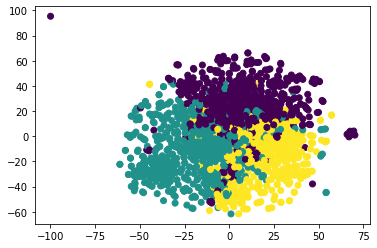

In [82]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plt.show()

In [83]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
groups_5 = fetch_20newsgroups(categories=categories_5)

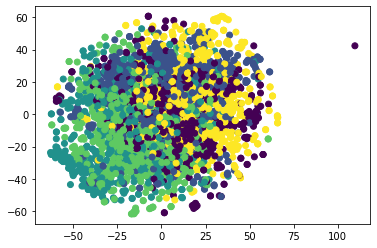

In [84]:
data_cleaned_5 = []
for doc in groups_5['data']:
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned_5.append(doc_cleaned)

count_vector_sw = CountVectorizer(stop_words='english', max_features=500)
data_cleaned_count_5 = count_vector_sw.fit_transform(data_cleaned_5)

tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_5)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_5.target)
plt.show()